In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
#from google.colab import auth
#auth.authenticate_user()

In [4]:
#!mkdir data
#!gcsfuse data_train_123 data

In [5]:
#%cd /content/data
#!ls

In [6]:

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import sys
%matplotlib inline
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
#from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
import logging
#from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam, SGD
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased',do_lower_case=False)
import pickle

In [8]:

#import time
#start_time = time.time()
#colnames = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
#                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
#               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
#               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
#               "engaging_user_account_creation", "engagee_follows_engager","retweet_timestamp","retweet_timestamp","retweet_with_comment_timestamp","like_timestamp"]

#df = pd.read_csv('train_english.tsv', sep='\x01', names=colnames, header=None, usecols= ["text_tokens","engaging_user_id","tweet_id","tweet_timestamp","retweet_timestamp","retweet_timestamp","retweet_with_comment_timestamp","like_timestamp"]  )

#a = df['engaging_user_id'].value_counts().reset_index(name="count").query("count > 20")["index"]
#df = df[df['engaging_user_id'].isin(a)]
#df.to_pickle('filtered_english.pkl')

In [9]:
#file = open("filtered_english_with_topics.pkl",'rb')
file = open("tfidf_topics.pkl",'rb')

df = pickle.load(file)
file.close()


In [96]:

import seaborn as sns

/home/skarra7/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0, 0.5, 'Number of topics')

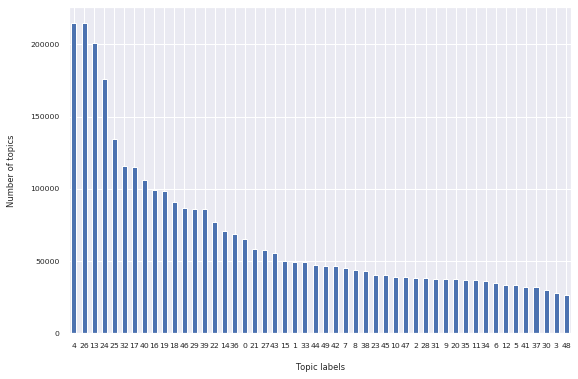

In [104]:
sns.set(font_scale=0.7)
df['text_tokens'].value_counts().plot(kind='bar', figsize=(9, 6), rot=0)
plt.xlabel("Topic labels", labelpad=14)
plt.ylabel("Number of topics", labelpad=14)
#plt.title("Histogram showing frequency of topics in the dataset", y=1.02);

In [11]:
df['engaging_user_id'].value_counts()

72C2BE10D3673447A6D596E12C0523DA    502
3396F36ADFF2A01A34C0CB3486CABFEE    388
5049F4AC51D668D064214377EB38A8D3    320
3FC1A3B3B9C8D1BD6673C3B5B65A6E91    308
F1D8FA7C91B5EE653330E80D48C77AD1    297
                                   ... 
44EE1AD3543CD2FFE179B890C4426385     21
5858378E140F9C3EF719EE2763D8D14A     21
06D0A3F7D9E56F53A5A058730B2096BA     21
3740A2FA1ABDA1F9E3C68EF56D3F843E     21
4A80D7FF6FD73D30FC8685BD24C79D00     21
Name: engaging_user_id, Length: 107017, dtype: int64

In [12]:
#filehandler = open('mgp.model', 'rb')
#mdl = pickle.load(filehandler)
#filehandler.close()

In [13]:
#df['text_tokens']= df['text_tokens'].str.split('\t').apply(lambda x:list(map(int, x)))

In [14]:
#np.random.seed(0)
#df['text_tokens'] = np.random.randint(1, 51, df.shape[0])
#df['text_tokens'] = df['text_tokens'].apply(lambda x: mdl.score(x).index(max(mdl.score(x))))

In [15]:
#df.to_pickle("filtered_english_with_topics.pkl")

In [16]:
import datetime
df['tweet_timestamp'] = df["tweet_timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x)) 

In [17]:
df['tweet_timestamp'].max()-df["tweet_timestamp"].min()

Timedelta('6 days 23:59:58')

In [18]:
t1 = df[(df["tweet_timestamp"] >= '2020-02-05 18:00:00') & (df["tweet_timestamp"] < '2020-02-06 06:00:00')]
t2 = df[(df["tweet_timestamp"] >= '2020-02-06 06:00:00') & (df["tweet_timestamp"] < '2020-02-06 18:00:00')]
t3 = df[(df["tweet_timestamp"] >= '2020-02-06 18:00:00') & (df["tweet_timestamp"] < '2020-02-07 06:00:00')]
t4 = df[(df["tweet_timestamp"] >= '2020-02-07 06:00:00') & (df["tweet_timestamp"] < '2020-02-07 18:00:00')]
t5 = df[(df["tweet_timestamp"] >= '2020-02-07 18:00:00') & (df["tweet_timestamp"] < '2020-02-08 06:00:00')]
t6 = df[(df["tweet_timestamp"] >= '2020-02-08 06:00:00') & (df["tweet_timestamp"] < '2020-02-08 18:00:00')]
t7 = df[(df["tweet_timestamp"] >= '2020-02-08 18:00:00') & (df["tweet_timestamp"] < '2020-02-09 06:00:00')]
t8 = df[(df["tweet_timestamp"] >= '2020-02-09 06:00:00') & (df["tweet_timestamp"] < '2020-02-09 18:00:00')]
t9 = df[(df["tweet_timestamp"] >= '2020-02-09 18:00:00') & (df["tweet_timestamp"] < '2020-02-10 06:00:00')]
t10 = df[(df["tweet_timestamp"] >= '2020-02-10 06:00:00') & (df["tweet_timestamp"] < '2020-02-10 18:00:00')]
t11 = df[(df["tweet_timestamp"] >= '2020-02-10 18:00:00') & (df["tweet_timestamp"] < '2020-02-11 06:00:00')]
t12 = df[(df["tweet_timestamp"] >= '2020-02-11 06:00:00') & (df["tweet_timestamp"] < '2020-02-11 18:00:00')]
t13 = df[(df["tweet_timestamp"] >= '2020-02-11 18:00:00') & (df["tweet_timestamp"] < '2020-02-12 06:00:00')]
t14 = df[(df["tweet_timestamp"] >= '2020-02-12 06:00:00') & (df["tweet_timestamp"] < '2020-02-12 18:00:00')]

# Each time period is 12 hrs
# Entire history of user is from time periods t1 to t12 
# Recent history of user is considered from time periods t8 to t12
# Current time period is considered as t13
# Testing will be carried out on time period t14


In [19]:
#data from 12th 6am to 6pm
#test_data = t14 
columns = ['reply_timestamp','tweet_timestamp', 'tweet_id',"retweet_timestamp","retweet_with_comment_timestamp","like_timestamp"]
t13['retweet'] = np.where(pd.notnull(t13['retweet_timestamp']), 1, 0)
t13.drop(columns, axis=1,inplace=True)
t_13 = t13.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
t13_history = t_13.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
t13_history.fillna(0,inplace = True)
history_t13 = pd.DataFrame(t13_history.to_records())
for col in history_t13.columns:
  if col != 'engaging_user_id':
    history_t13.loc[history_t13[col] > 1, col] = 1


t14['retweet'] = np.where(pd.notnull(t14['retweet_timestamp']), 1, 0)

t14.drop(columns, axis=1,inplace=True)
t_14 = t14.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
test_info = t_14.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
test_info.fillna(0,inplace = True)
test = pd.DataFrame(test_info.to_records())
for col in test.columns:
  if col != 'engaging_user_id':
    test.loc[test[col] > 1, col] = 1

In [20]:
#Recent history
t9['retweet'] = np.where(pd.notnull(t9['retweet_timestamp']), 1, 0)
t9.drop(columns, axis=1,inplace=True)
t_9 = t9.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
t9_history = t_9.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
t9_history.fillna(0,inplace = True)
history_t9 = pd.DataFrame(t9_history.to_records())
for col in history_t9.columns:
  if col != 'engaging_user_id':
    history_t9.loc[history_t9[col] > 1, col] = 1

t10['retweet'] = np.where(pd.notnull(t10['retweet_timestamp']), 1, 0)
t10.drop(columns, axis=1,inplace=True)
t_10 = t10.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
t10_history = t_10.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
t10_history.fillna(0,inplace = True)
history_t10 = pd.DataFrame(t10_history.to_records())
for col in history_t10.columns:
  if col != 'engaging_user_id':
    history_t10.loc[history_t10[col] > 1, col] = 1

t11['retweet'] = np.where(pd.notnull(t11['retweet_timestamp']), 1, 0)
t11.drop(columns, axis=1,inplace=True)
t_11 = t11.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
t11_history = t_11.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
t11_history.fillna(0,inplace = True)
history_t11 = pd.DataFrame(t11_history.to_records())
for col in history_t11.columns:
  if col != 'engaging_user_id':
    history_t11.loc[history_t11[col] > 1, col] = 1


t12['retweet'] = np.where(pd.notnull(t12['retweet_timestamp']), 1, 0)
t12.drop(columns, axis=1,inplace=True)
t_12 = t12.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
t12_history = t_12.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
t12_history.fillna(0,inplace = True)
history_t12 = pd.DataFrame(t12_history.to_records())
for col in history_t12.columns:
  if col != 'engaging_user_id':
    history_t12.loc[history_t12[col] > 1, col] = 1




In [21]:
#total history frequency
eng_frequency = df[df["tweet_timestamp"] < '2020-02-12 06:00:00']
eng_frequency['retweet'] = np.where(pd.notnull(eng_frequency['retweet_timestamp']), 1, 0)

#conversion of engagement history frequencies to format need by our deep learning model
columns = ['tweet_timestamp', 'tweet_id', 'reply_timestamp', "retweet_timestamp","retweet_with_comment_timestamp","like_timestamp"]
eng_frequency.drop(columns, axis=1,inplace=True)
#engagement_history = eng_frequency.groupby(['engaging_user_id', 'text_tokens', 'retweet']).retweet.agg('sum').to_frame('replied').reset_index()
engagement_history = eng_frequency.groupby(['engaging_user_id', 'text_tokens'])[['retweet']].agg('sum')
input_engagement_history = engagement_history.pivot_table(index='engaging_user_id', columns='text_tokens', values='retweet')
input_engagement_history.fillna(0,inplace = True)
history_frequency = pd.DataFrame(input_engagement_history.to_records())

In [22]:
left_out_rows_t9 = history_frequency[~history_frequency['engaging_user_id'].isin(history_t9['engaging_user_id'])]
for col in left_out_rows_t9.columns:
    if col != 'engaging_user_id':
        left_out_rows_t9[col].values[:] = 0
final_history_t9 = history_t9.append(left_out_rows_t9)
final_history_t9 = final_history_t9.sort_values('engaging_user_id')
final_history_t9.reset_index(drop=True, inplace=True)

left_out_rows_t10 = history_frequency[~history_frequency['engaging_user_id'].isin(history_t10['engaging_user_id'])]
for col in left_out_rows_t10.columns:
    if col != 'engaging_user_id':
        left_out_rows_t10[col].values[:] = 0
final_history_t10 = history_t10.append(left_out_rows_t10)
final_history_t10 = final_history_t10.sort_values('engaging_user_id')
final_history_t10.reset_index(drop=True, inplace=True)

left_out_rows_t11 = history_frequency[~history_frequency['engaging_user_id'].isin(history_t11['engaging_user_id'])]
for col in left_out_rows_t11.columns:
    if col != 'engaging_user_id':
        left_out_rows_t11[col].values[:] = 0
final_history_t11 = history_t11.append(left_out_rows_t11)
final_history_t11 = final_history_t11.sort_values('engaging_user_id')
final_history_t11.reset_index(drop=True, inplace=True)


left_out_rows_t12 = history_frequency[~history_frequency['engaging_user_id'].isin(history_t12['engaging_user_id'])]
for col in left_out_rows_t12.columns:
    if col != 'engaging_user_id':
        left_out_rows_t12[col].values[:] = 0
final_history_t12 = history_t12.append(left_out_rows_t12)
final_history_t12 = final_history_t12.sort_values('engaging_user_id')
final_history_t12.reset_index(drop=True, inplace=True)





In [23]:
from functools import reduce
recent_history = reduce(lambda x,y: pd.merge(x,y, on='engaging_user_id', how='outer'), [final_history_t9, final_history_t10, final_history_t11, final_history_t12])

In [24]:

#label for training
left_out_rows_t13 = history_frequency[~history_frequency['engaging_user_id'].isin(history_t13['engaging_user_id'])]
for col in left_out_rows_t13.columns:
    if col != 'engaging_user_id':
        left_out_rows_t13[col].values[:] = 0
final_history_t13 = history_t13.append(left_out_rows_t13)
final_history_t13 = final_history_t13.sort_values('engaging_user_id')
final_history_t13.reset_index(drop=True, inplace=True)

#label for testing
left_out_rows = history_frequency[~history_frequency['engaging_user_id'].isin(test['engaging_user_id'])]
for col in left_out_rows.columns:
    if col != 'engaging_user_id':
        left_out_rows[col].values[:] = 0
final_test = test.append(left_out_rows)
final_test = final_test.sort_values('engaging_user_id')
final_test.reset_index(drop=True, inplace=True)        

In [25]:
history_frequency = history_frequency.sort_values('engaging_user_id')

In [26]:
#coupon equivalent recommendations for final testing


time = df[(df["tweet_timestamp"] >= '2020-02-12 06:00:00') & (df["tweet_timestamp"] < '2020-02-12 18:00:00')]
left = time[time['retweet_timestamp'] >= 0]
time['retweet_timestamp'].fillna(0,inplace=True)

left['retweet_timestamp'] = left["retweet_timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x))
time = pd.concat([time,left]).drop_duplicates(keep=False)
time['retweet_timestamp'] = time['tweet_timestamp']
final = pd.concat([time,left])

final = final.sort_values(['engaging_user_id', 'retweet_timestamp'], ascending=[True, False])
final = final.reset_index(drop=True)

columns = ['tweet_id',"reply_timestamp","retweet_with_comment_timestamp","like_timestamp"]
final.drop(columns, axis=1,inplace=True)


#coupon equivalent recommendations for intial training
time_1 = df[(df["tweet_timestamp"] >= '2020-02-11 18:00:00') & (df["tweet_timestamp"] < '2020-02-12 06:00:00')]
left_1 = time_1[time_1['retweet_timestamp'] >= 0]
time_1['retweet_timestamp'].fillna(0,inplace=True)

left_1['retweet_timestamp'] = left_1["retweet_timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x))
time_1 = pd.concat([time_1,left_1]).drop_duplicates(keep=False)
time_1['retweet_timestamp'] = time_1['tweet_timestamp']
initial = pd.concat([time_1,left_1])

initial = initial.sort_values(['engaging_user_id', 'retweet_timestamp'], ascending=[True, False])
initial = initial.reset_index(drop=True)

columns = ['tweet_id',"reply_timestamp","retweet_with_comment_timestamp","like_timestamp"]
initial.drop(columns, axis=1,inplace=True)

In [27]:
g = 3
for index, row in final.iterrows():
  if g != 10 :
    a = row['engaging_user_id']
    b = row['tweet_timestamp']
    c = row['retweet_timestamp']
    p = 0
    if b != c :
      g = 10
  if (row['tweet_timestamp'] != row['retweet_timestamp']):
      p = 1
      d = row['engaging_user_id']
      e = row['tweet_timestamp']
      f = row['retweet_timestamp']
  elif row['tweet_timestamp'] == row['retweet_timestamp']:
      if row['engaging_user_id'] == a:
        p = 0
      elif row['engaging_user_id'] == d:
        if (row['tweet_timestamp'] >= e) & (row['tweet_timestamp'] <= f):
          p = 1
        else:
          p = 0
  final.loc[index,'recommend'] = p
  #clear_output(wait=True)    
  

In [28]:
g_1 = 3
for index, row in initial.iterrows():
  if g_1 != 10 :
    a_1 = row['engaging_user_id']
    b_1 = row['tweet_timestamp']
    c_1 = row['retweet_timestamp']
    p_1 = 0
    if b_1 != c_1 :
      g_1 = 10
  if (row['tweet_timestamp'] != row['retweet_timestamp']):
      p_1 = 1
      d_1 = row['engaging_user_id']
      e_1 = row['tweet_timestamp']
      f_1 = row['retweet_timestamp']
  elif row['tweet_timestamp'] == row['retweet_timestamp']:
      if row['engaging_user_id'] == a_1:
        p_1 = 0
      elif row['engaging_user_id'] == d_1:
        if (row['tweet_timestamp'] >= e_1) & (row['tweet_timestamp'] <= f_1):
          p_1 = 1
        else:
          p_1 = 0
  initial.loc[index,'recommend'] = p_1
  #clear_output(wait=True)    
  

In [31]:
column = ['tweet_timestamp','retweet_timestamp']
final.drop(column, axis=1,inplace=True)
initial.drop(column, axis=1,inplace=True)



In [32]:
final_1 = final.groupby(['engaging_user_id', 'text_tokens'])[['recommend']].agg('sum')
final_2 = final_1.pivot_table(index='engaging_user_id', columns='text_tokens', values='recommend')
final_2.fillna(0,inplace = True)
final_3 = pd.DataFrame(final_2.to_records())

for col in final_3.columns:
  if col != 'engaging_user_id':
    final_3.loc[final_3[col] > 1, col] = 1
    
    
left_out_rows_f = history_frequency[~history_frequency['engaging_user_id'].isin(final_3['engaging_user_id'])]
for col in left_out_rows_f.columns:
    if col != 'engaging_user_id':
        left_out_rows_f[col].values[:] = 0
final_4 = final_3.append(left_out_rows_f)
recommend_test = final_4.sort_values('engaging_user_id')
recommend_test.reset_index(drop=True, inplace=True)    

In [33]:
initial_1 = initial.groupby(['engaging_user_id', 'text_tokens'])[['recommend']].agg('sum')
initial_2 = initial_1.pivot_table(index='engaging_user_id', columns='text_tokens', values='recommend')
initial_2.fillna(0,inplace = True)
initial_3 = pd.DataFrame(final_2.to_records())

for col in initial_3.columns:
  if col != 'engaging_user_id':
    initial_3.loc[final_3[col] > 1, col] = 1
    
left_out_rows_g = history_frequency[~history_frequency['engaging_user_id'].isin(final_3['engaging_user_id'])]
for col in left_out_rows_g.columns:
    if col != 'engaging_user_id':
        left_out_rows_f[col].values[:] = 0
initial_4 = initial_3.append(left_out_rows_f)
recommend = initial_4.sort_values('engaging_user_id')
recommend.reset_index(drop=True, inplace=True)      
    

In [34]:
X_recent_2 = recent_history.drop('engaging_user_id', axis=1).values
X_recent_1 = X_recent_2.reshape(-1,50,4)

X_freq_1 = history_frequency.drop('engaging_user_id', axis=1).values

X_recommend_1 = recommend.drop('engaging_user_id', axis=1).values

X_recommend_t = recommend_test.drop('engaging_user_id', axis=1).values

y_1 = final_history_t13.drop('engaging_user_id', axis=1).values

y_t = final_test.drop('engaging_user_id', axis=1).values

#INPUTS
X_recent = torch.FloatTensor(X_recent_1)
X_freq = torch.FloatTensor(X_freq_1)
X_recommend = torch.FloatTensor(X_recommend_1)
y = torch.FloatTensor(y_1)

X_recommend_test = torch.FloatTensor(X_recommend_t)
Y_test = torch.FloatTensor(y_t)


In [35]:
#final_test['1'].value_counts()
b = []
for i in range(50):
       b.append(final_history_t13[str(i)].sum())
#weights = torch.tensor(list((np.array(b)/len(y))))

In [36]:
np.array(b)

array([ 774.,  542.,  601.,  314., 2049.,  438.,  761.,  492.,  359.,
        590.,  645.,  442.,  479., 4783.,  748.,  572.,  775., 2157.,
       1375., 1333.,  497.,  720., 1131.,  476., 2639.,  503., 1942.,
        753.,  611., 1074.,  357.,  519., 1191., 1004.,  381.,  474.,
        752.,  304.,  440., 1179., 1064.,  352.,  545.,  976.,  680.,
        736.,  583.,  590.,  344.,  646.])

In [37]:
np.array(b)

array([ 774.,  542.,  601.,  314., 2049.,  438.,  761.,  492.,  359.,
        590.,  645.,  442.,  479., 4783.,  748.,  572.,  775., 2157.,
       1375., 1333.,  497.,  720., 1131.,  476., 2639.,  503., 1942.,
        753.,  611., 1074.,  357.,  519., 1191., 1004.,  381.,  474.,
        752.,  304.,  440., 1179., 1064.,  352.,  545.,  976.,  680.,
        736.,  583.,  590.,  344.,  646.])

In [38]:
c = 107017*np.ones((50))

In [39]:
weights  = torch.tensor((c-np.array(b))/np.array(b))

In [40]:
# class DNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         #frequency input
#         self.fc1 = nn.Linear(in_features=50, out_features=30)

#         #history input
#         self.conv1 = nn.Conv2d(1,10,3,1)
        
#         self.leaky = nn.LeakyReLU()
#         self.fc2 = nn.Linear(960, 50)
#         self.fc4 = nn.Linear(in_features=50, out_features=30) 

#         #recommend input
#         self.fc3 = nn.Linear(in_features=50, out_features=30)        

#         self.output = nn.Linear(in_features=240, out_features=50)
 
#     def forward(self, x, y, z):
#         x = self.fc1(x)
#         x1 = F.linear(x, self.fc1.weight.t())
#         y = y.view(-1,1,50,4)
#         y = self.conv1(y)
#         y = self.leaky(y)
#         y = y.view(y.size(0),-1)
#         y = self.fc2(y)
#         y = self.fc4(y)
#         y1 = F.linear(y, self.fc4.weight.t())
        
#         z = self.fc3(z)
#         z1 = F.linear(z, self.fc3.weight.t())


#         w = torch.cat((x, x1, y, y1, z, z1), dim=1)
#         w = self.output(w)
#         w = F.sigmoid(w)
#         return w

In [41]:
filters = 20
L = 10
class DNN_f(nn.Module):
    def __init__(self):
        super().__init__()
        #frequency input
        self.fc1 = nn.Linear(in_features=50, out_features=L)

        #history input 32 * 50 * 4
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = filters, kernel_size = (1,4) ,stride = 1)
        self.leaky = nn.LeakyReLU()
        self.conv2 = nn.Conv2d(in_channels = filters, out_channels = filters, kernel_size = (50-L+1,1) ,stride = 1)
        self.conv3 = nn.ConvTranspose2d(in_channels = filters, out_channels = filters, kernel_size =(50-L+1,1), stride =1)


        #recommend input
        self.fc3 = nn.Linear(in_features=50, out_features=L)
        
        #final linear
        self.conv4 = nn.Conv2d(in_channels = 1, out_channels=1, kernel_size=(1, 5+2*(filters)), stride = 1)        

 
    def forward(self, x, y, z, a):
        x1 = self.fc1(x)      ### EH
        x2 = F.linear(x1, self.fc1.weight.t())  #### EH BAR

        
        y = y.view(-1,1,50,4)
        y1 = self.conv1(y)
        y1 = self.leaky(y1)
        y2 = y1.view(-1,50,filters)   ####   ET       
        y1 = self.conv2(y1)
        y1 = self.conv3(y1)
        y3 = y1.view(-1,50,filters)   ####   ETBAR

        
        z1 = self.fc3(z)    ####  DT
        z2 = F.linear(z1, self.fc3.weight.t())    #### DTBAR

        
        w = torch.stack((x, x2,z, z2), dim=2)
        v = torch.cat((y2,y3),dim =2)
        u = torch.cat((w,v),dim=2)
        a = a.view(-1,50,1)
        r = torch.cat((a,u),dim = 2)
        
        r = r.view(-1,1,50,5+2*(filters))
        t = self.conv4(r)
        #s = F.sigmoid(t)
        s = t.view(-1,50)

        return s

In [42]:
torch.ones([32, 50], dtype=torch.float64).shape

torch.Size([32, 50])

In [43]:
model = DNN_f()
model = model.to(device)

In [44]:
optimizer = Adam(model.parameters(), lr=1e-5)
#loss_func = nn.BCEWithLogitsLoss(pos_weight = weights, reduction = 'sum').cuda()
loss_func = nn.BCEWithLogitsLoss(reduction = 'sum').cuda()

BATCH_SIZE = 32
train_loss = 0
losses = []
steps = []
step = 0
count = 0
EPOCHS = 50

In [45]:
X_indicator = torch.ones([107017, 50])
import time
start_time = time.time()
train_dataset = TensorDataset(X_freq, X_recent, X_recommend, y, X_indicator)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)
print ("--- %s seconds ---" % (time.time() - start_time))


for epoch_num in range(EPOCHS):
    model.train()
    for step_num, batch_data in enumerate(train_dataloader):
        freq, recent, recommend, labels, indicator = tuple(t.to(device)for t in batch_data)
        probas = model(freq, recent, recommend, indicator)
        batch_loss = loss_func(probas, labels)
        train_loss += batch_loss.item()

        model.zero_grad()
        batch_loss.backward()


        #clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()

        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("{0}/{1} loss: {2} ".format(step_num, len(y)/BATCH_SIZE, train_loss / (count + 1)))
        print ("--- %s seconds ---" % (time.time() - start_time))
        losses.append(batch_loss.item())
        steps.append(step)
        step += 1
        count += 1


Epoch:  50
3344/3344.28125 loss: 62.1535778712485 
--- 792.5647783279419 seconds ---


In [46]:
#Optimization part
torch.save(model, 'model_retweet_32_50_20F_10L.pt')

#torch.save({'state_dict': model.state_dict()}, 'checkpoint.pth.tar')

#model = describe_model()
#checkpoint = torch.load('checkpoint.pth.tar')
#model.load_state_dict(checkpoint['state_dict'])

/home/skarra7/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DNN_f. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/skarra7/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/skarra7/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/skarra7/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeakyReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". 

In [105]:
model.eval()

with torch.no_grad():

    logits_train = model(X_freq.to(device), X_recent.to(device), X_recommend.to(device), X_indicator.to(device)).to('cpu')
    logits_test = model(X_freq.to(device), X_recent.to(device), X_recommend_test.to(device), X_indicator.to(device)).to('cpu')
    numpy_logits_train = logits_train.detach().numpy()
    numpy_logits_test = logits_test.detach().numpy()
    
        

In [106]:
logits_test

tensor([[-4.3228, -4.8517, -4.0459,  ..., -4.7069, -5.3250, -4.4582],
        [-5.4917, -5.8920, -5.9616,  ..., -5.7818, -6.2588, -5.8800],
        [-5.3269, -5.2297, -5.3439,  ..., -5.6623, -6.3427, -5.1711],
        ...,
        [-5.4083, -5.8910, -5.9224,  ..., -5.7404, -6.2385, -5.8938],
        [-5.3357, -5.8570, -5.8718,  ..., -5.6982, -6.2685, -5.8609],
        [-5.4548, -5.8836, -5.9773,  ..., -5.7613, -6.2772, -5.8548]])

In [107]:
import numpy as np
import math

# custom function
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# define vectorized sigmoid
sigmoid_v = np.vectorize(sigmoid)


In [108]:
numpy_probas_test = sigmoid_v(numpy_logits_test)
numpy_probas_train = sigmoid_v(numpy_logits_train)

In [109]:
with open('numpy_probas_test_bce.pkl','wb') as f:
      pickle.dump(numpy_probas_test, f)

In [52]:
from sklearn.metrics import log_loss
log_loss(Y_test.numpy(),numpy_probas_test)

1.9158703509623438

In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score,roc_auc_score
          
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result





Best Threshold=0.006066, G-Mean=0.738


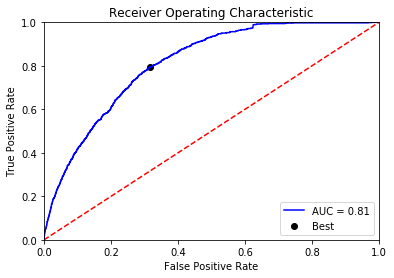

Best Threshold=0.003872, G-Mean=0.753


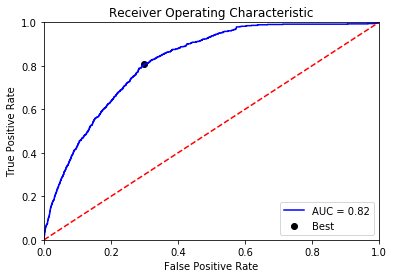

Best Threshold=0.004022, G-Mean=0.762


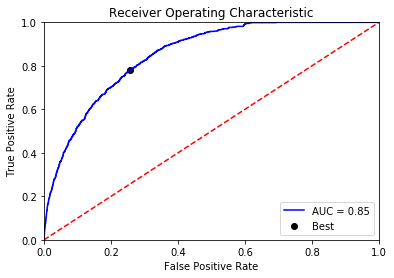

Best Threshold=0.002494, G-Mean=0.752


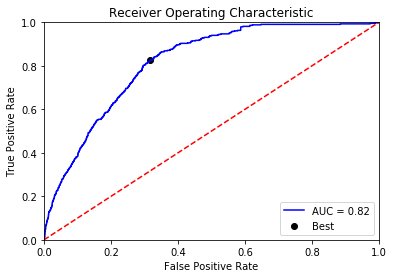

Best Threshold=0.009015, G-Mean=0.734


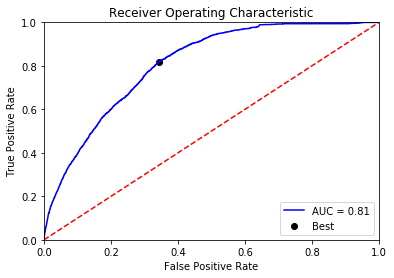

Best Threshold=0.003046, G-Mean=0.766


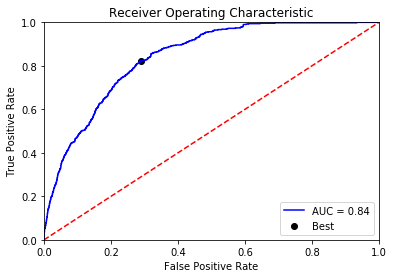

Best Threshold=0.004640, G-Mean=0.766


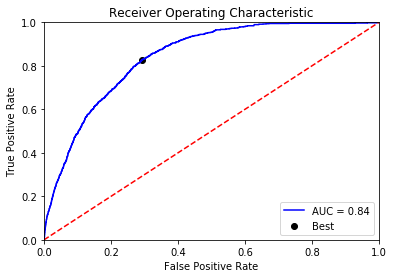

Best Threshold=0.003618, G-Mean=0.732


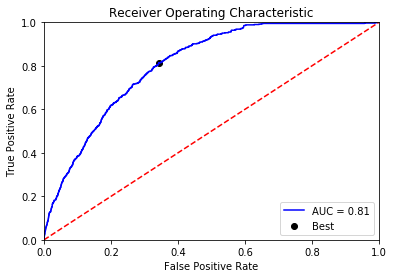

Best Threshold=0.002432, G-Mean=0.742


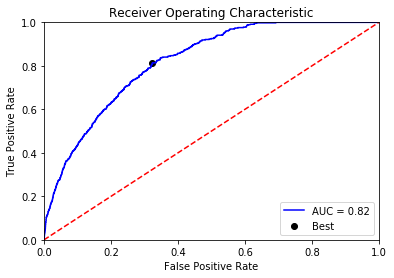

Best Threshold=0.004243, G-Mean=0.768


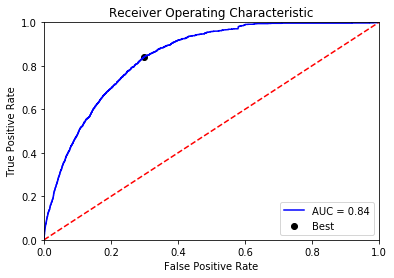

Best Threshold=0.004870, G-Mean=0.754


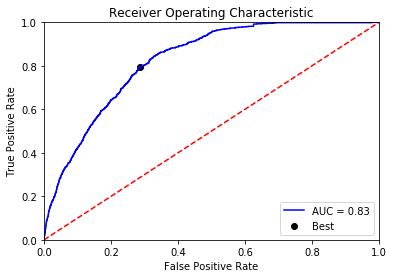

Best Threshold=0.003503, G-Mean=0.742


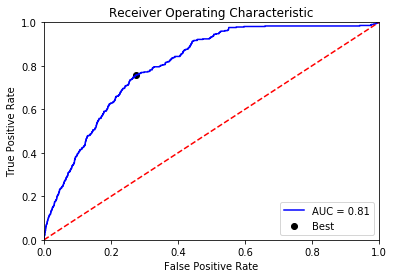

Best Threshold=0.003788, G-Mean=0.742


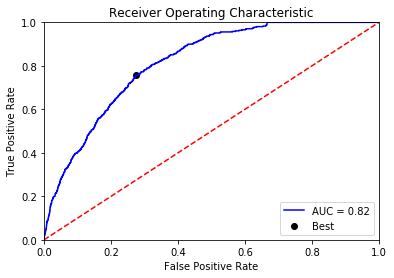

Best Threshold=0.018560, G-Mean=0.844


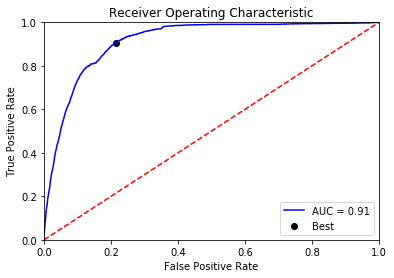

Best Threshold=0.005095, G-Mean=0.756


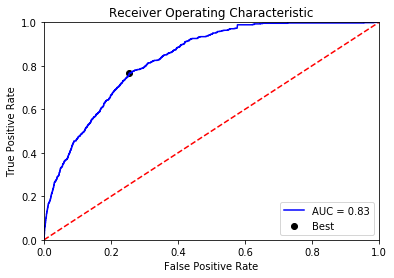

Best Threshold=0.003202, G-Mean=0.763


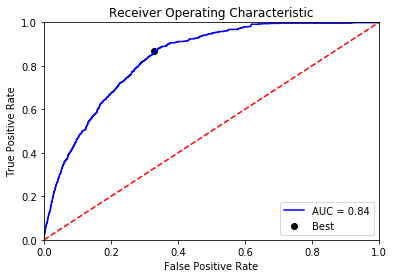

Best Threshold=0.003284, G-Mean=0.756


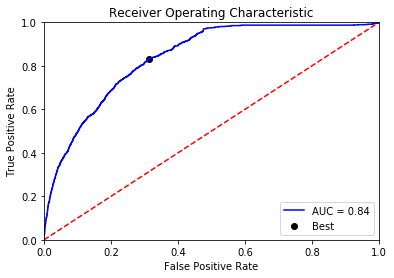

Best Threshold=0.010693, G-Mean=0.804


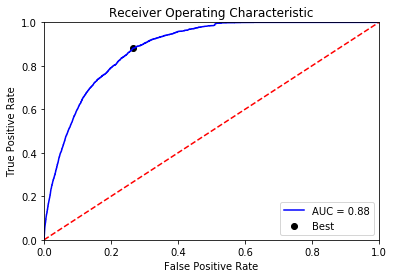

Best Threshold=0.007928, G-Mean=0.771


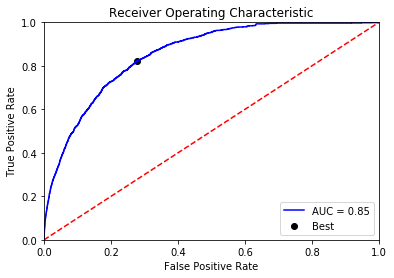

Best Threshold=0.007865, G-Mean=0.733


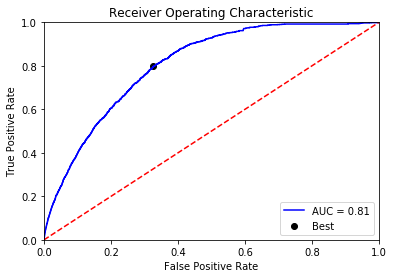

Best Threshold=0.004043, G-Mean=0.731


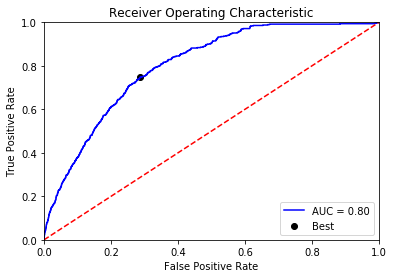

Best Threshold=0.005157, G-Mean=0.739


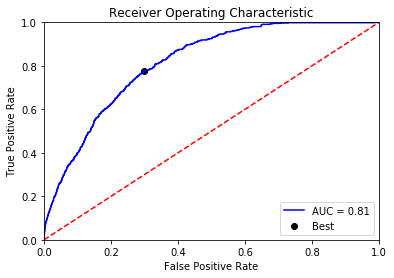

Best Threshold=0.006635, G-Mean=0.767


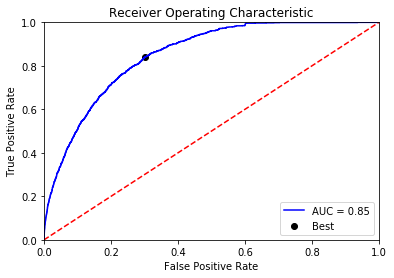

Best Threshold=0.003125, G-Mean=0.742


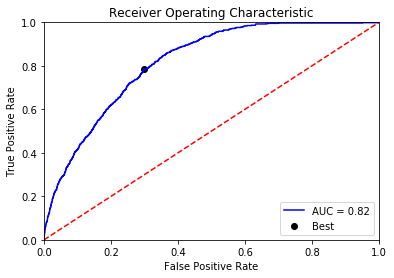

Best Threshold=0.010183, G-Mean=0.830


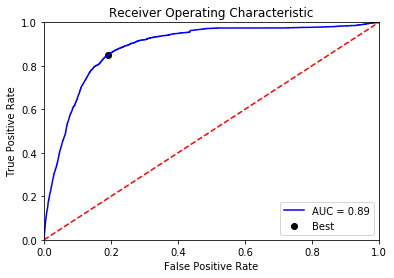

Best Threshold=0.003089, G-Mean=0.731


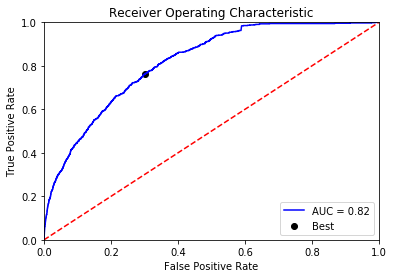

Best Threshold=0.009707, G-Mean=0.733


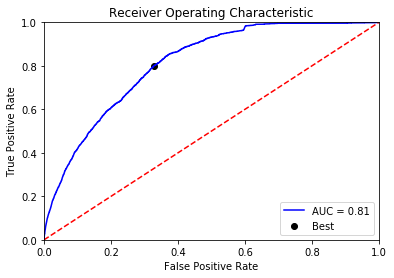

Best Threshold=0.004591, G-Mean=0.747


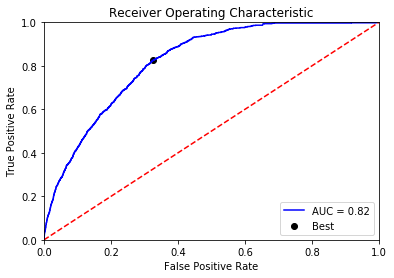

Best Threshold=0.004016, G-Mean=0.769


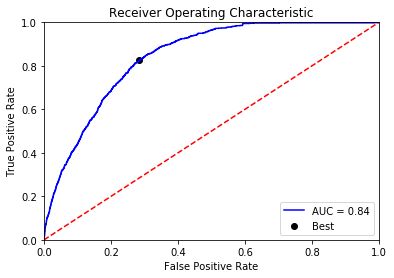

Best Threshold=0.000306, G-Mean=0.847


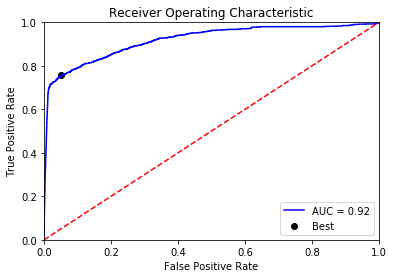

Best Threshold=0.002961, G-Mean=0.747


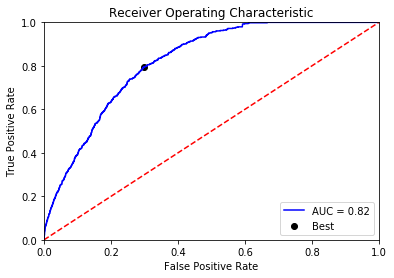

Best Threshold=0.003544, G-Mean=0.732


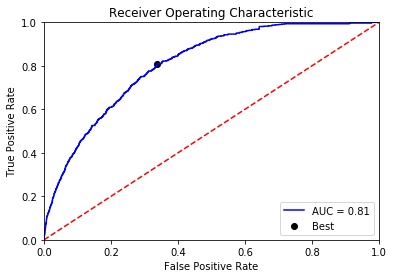

Best Threshold=0.006718, G-Mean=0.785


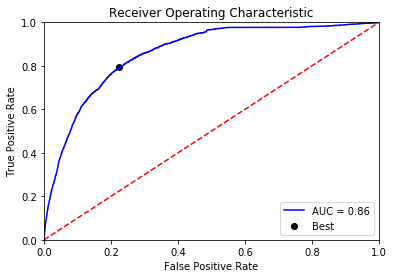

Best Threshold=0.007044, G-Mean=0.782


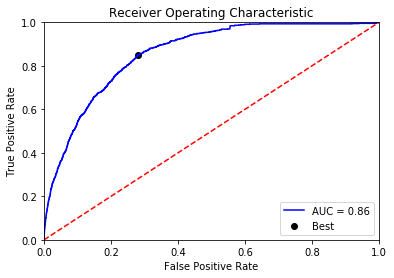

Best Threshold=0.002724, G-Mean=0.735


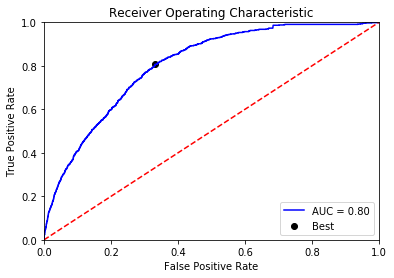

Best Threshold=0.003114, G-Mean=0.751


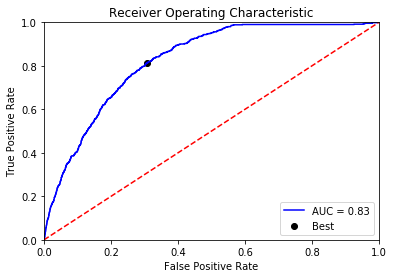

Best Threshold=0.004400, G-Mean=0.785


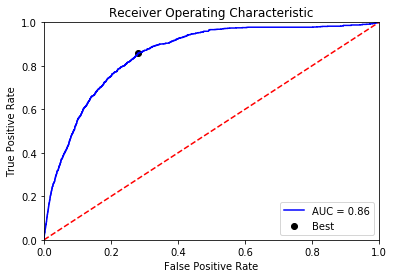

Best Threshold=0.002457, G-Mean=0.750


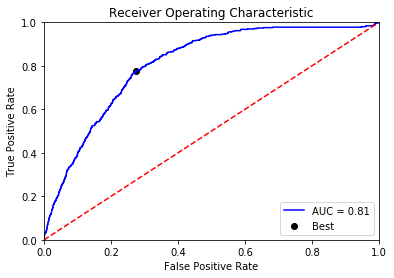

Best Threshold=0.003115, G-Mean=0.735


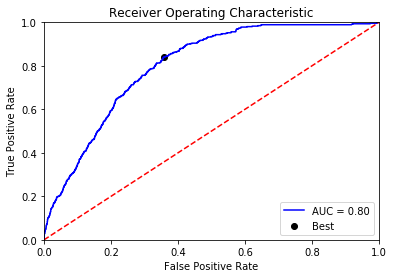

Best Threshold=0.004689, G-Mean=0.784


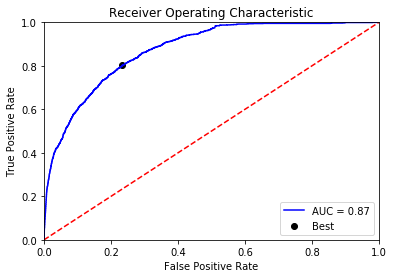

Best Threshold=0.006410, G-Mean=0.739


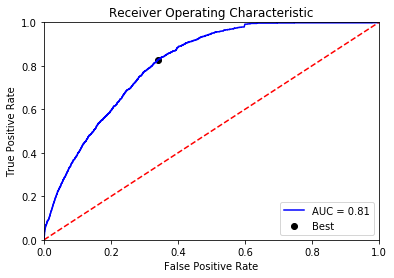

Best Threshold=0.002863, G-Mean=0.756


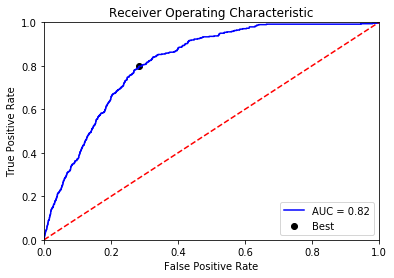

Best Threshold=0.004117, G-Mean=0.752


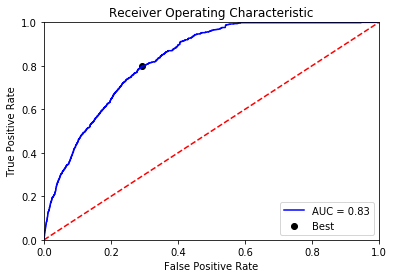

Best Threshold=0.006239, G-Mean=0.775


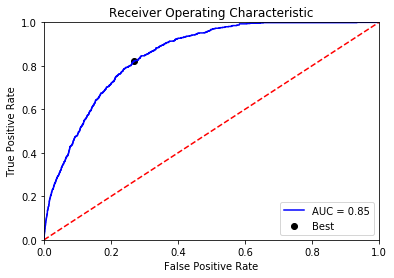

Best Threshold=0.005265, G-Mean=0.762


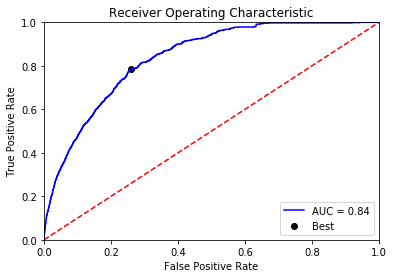

Best Threshold=0.005652, G-Mean=0.737


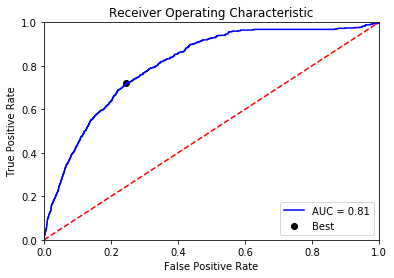

Best Threshold=0.003938, G-Mean=0.766


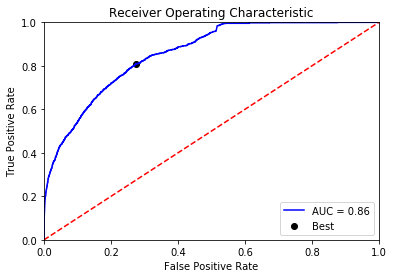

Best Threshold=0.004354, G-Mean=0.742


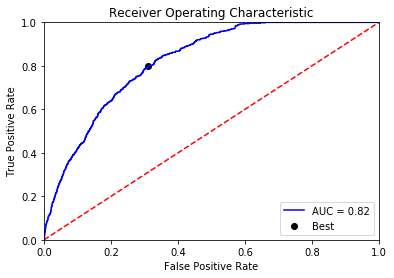

Best Threshold=0.002537, G-Mean=0.737


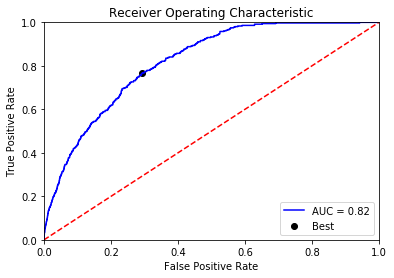

Best Threshold=0.003978, G-Mean=0.761


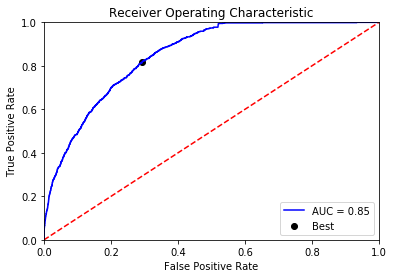

In [54]:
thresh = []
roc = []
for i in range(50):    
    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    #probs = model.predict_proba(X_test)
    #preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test[:,i].numpy(), numpy_probas_test[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    roc.append(roc_auc)
    thresh.append(optimal_threshold)
    
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [55]:
sum(roc)/50

0.8337364721934929

In [56]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

for i in range(50):
    numpy_probas_test[:,i] = to_labels(numpy_probas_test[:,i],thresh[i])

In [57]:
scores = []
for i in range(50):
    scores.append(binary_classification_performance(Y_test[:,i].numpy(),numpy_probas_test[:,i]))

In [58]:
f = pd.concat(scores)

In [1]:
#from sklearn.metrics import multilabel_confusion_matrix
#multilabel_confusion_matrix(Y_test.numpy(), numpy_probas_test)

# Binary Logits

In [61]:
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier


In [62]:
# input_dim = 6 #6 features per topic per customer
# output_dim = 1 



In [63]:
# class LogisticRegressionModel(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LogisticRegressionModel, self).__init__()
#         self.linear = nn.Linear(input_dim, output_dim)
    
#     def forward(self, x):
#         out = self.linear(x)
#         return out

In [64]:
empty_train = []
empty_test = []

empty_train_p = []
empty_test_p = []
#f1_list = []
for i in range(50):
    recent_lm_train = X_recent_2[:,[i,i+50,i+100,i+150]]
    freq_lm_train = X_freq_1[:,i]
    recommend_lm_train = X_recommend_1[:,i]
    
    #recent_lm_test = X_recent_2[:,[i,i+50,i+100,i+150]]
    #freq_lm_test = X_freq_1[:,i]
    recommend_lm_test = X_recommend_t[:,i]


    y_lm_train = y_1[:,i]

    X = np.column_stack([recent_lm_train,freq_lm_train,recommend_lm_train])

    #LR = LogisticRegression(class_weight="balanced")
    LR = LogisticRegression()

    LR.fit(X,y_lm_train)
    
    X_test = np.column_stack([recent_lm_train,freq_lm_train,recommend_lm_test])
    
    empty_train_p.append((LR.predict_proba(X)[:,1]))

    empty_train.append(LR.predict(X))
    
    
    empty_test_p.append((LR.predict_proba(X_test)[:,1]))
    
    empty_test.append(LR.predict(X_test))
    

In [110]:
prediction_lr_train = np.transpose(np.array(empty_train))
prediction_lr_test = np.transpose(np.array(empty_test))

prediction_lr_train_p = np.transpose(np.array(empty_train_p))
prediction_lr_test_p = np.transpose(np.array(empty_test_p))

In [111]:
# prediction_lr_test_p
with open('prediction_lr_test_p_bce.pkl','wb') as f:
      pickle.dump(prediction_lr_test_p, f)

In [66]:
from sklearn.metrics import log_loss
log_loss(Y_test.numpy(),prediction_lr_test_p)

2.1482516458472936

Best Threshold=0.002741, G-Mean=0.459


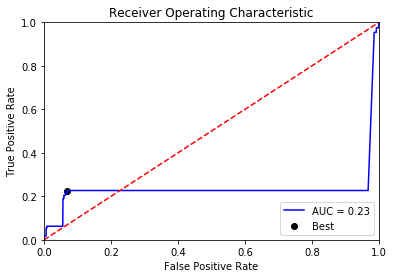

Best Threshold=0.003368, G-Mean=0.479


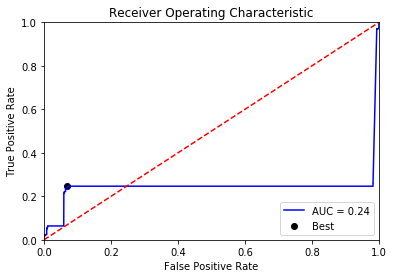

Best Threshold=0.002955, G-Mean=0.957


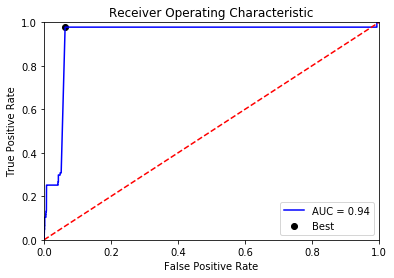

Best Threshold=0.006573, G-Mean=0.344


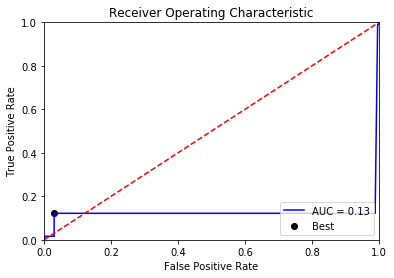

Best Threshold=0.009631, G-Mean=0.640


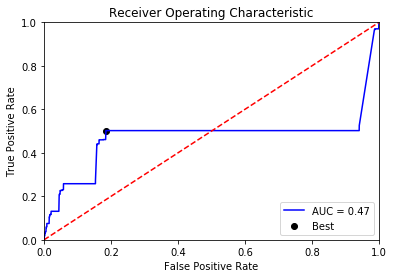

Best Threshold=0.002104, G-Mean=0.454


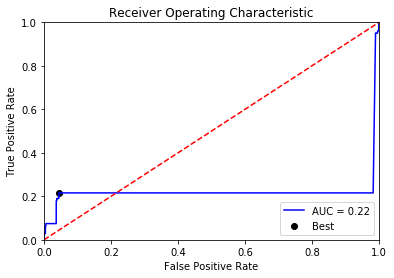

Best Threshold=0.002526, G-Mean=0.967


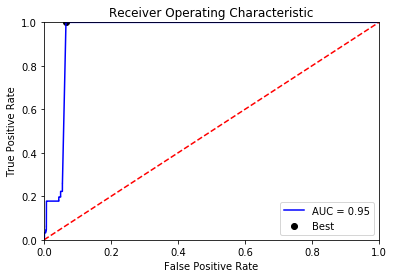

Best Threshold=0.001737, G-Mean=0.959


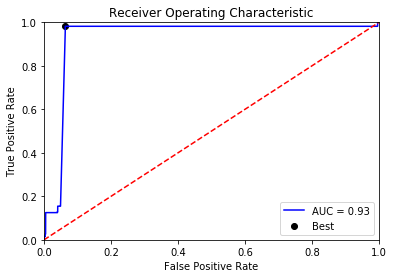

Best Threshold=0.001724, G-Mean=0.424


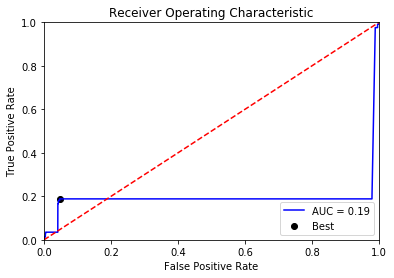

Best Threshold=0.002388, G-Mean=0.939


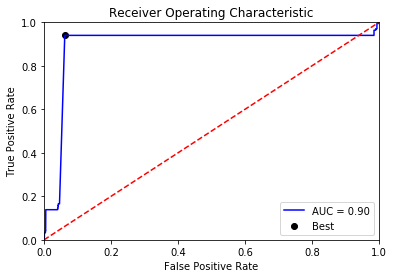

Best Threshold=0.002219, G-Mean=0.495


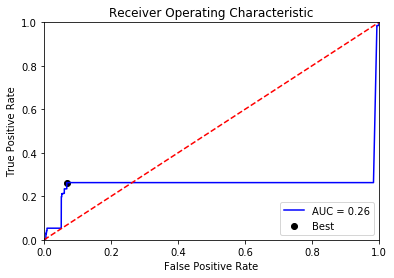

Best Threshold=0.001800, G-Mean=0.419


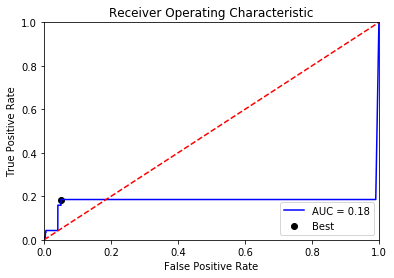

Best Threshold=0.001619, G-Mean=0.966


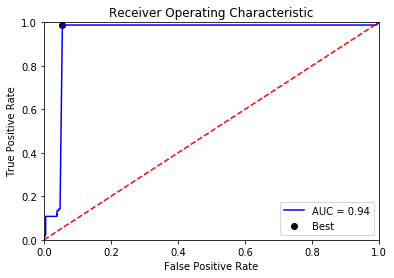

Best Threshold=0.017017, G-Mean=0.882


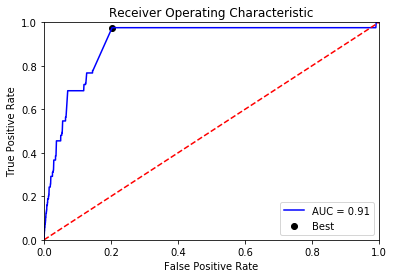

Best Threshold=0.004747, G-Mean=0.949


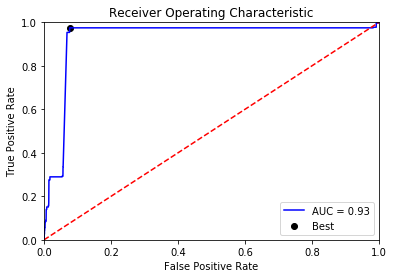

Best Threshold=0.005516, G-Mean=0.524


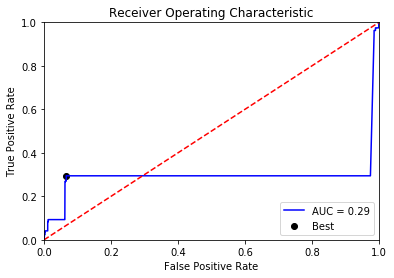

Best Threshold=0.005149, G-Mean=0.932


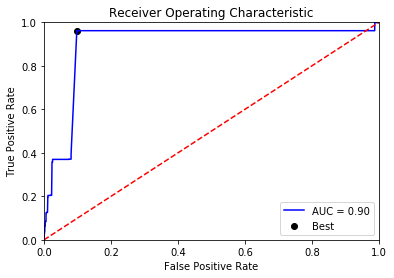

Best Threshold=0.008768, G-Mean=0.910


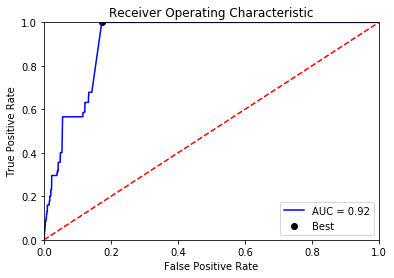

Best Threshold=0.007123, G-Mean=0.629


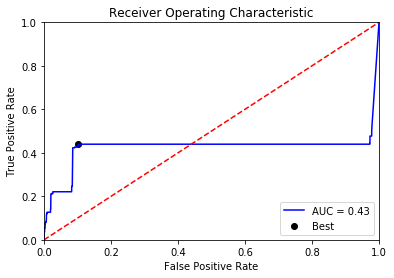

Best Threshold=0.006023, G-Mean=0.905


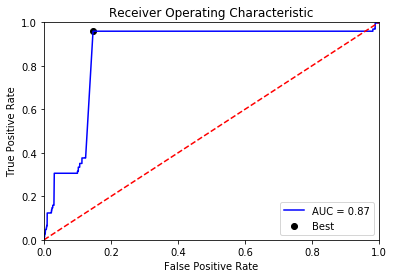

Best Threshold=0.009574, G-Mean=0.351


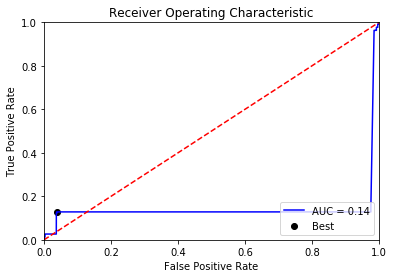

Best Threshold=0.005615, G-Mean=0.438


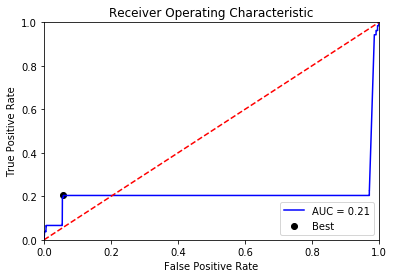

Best Threshold=0.006649, G-Mean=0.936


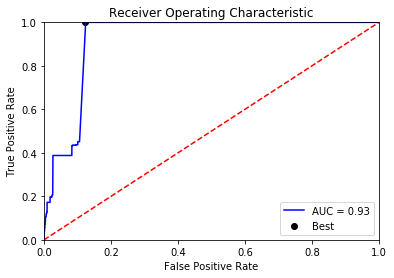

Best Threshold=0.001974, G-Mean=0.957


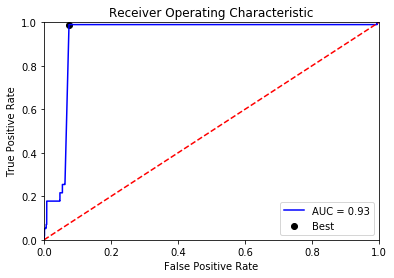

Best Threshold=0.011783, G-Mean=0.895


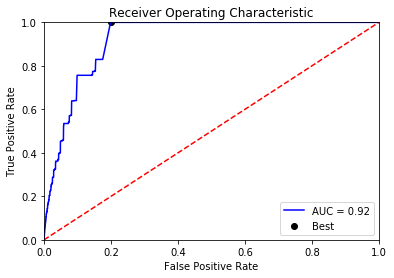

Best Threshold=0.003272, G-Mean=0.921


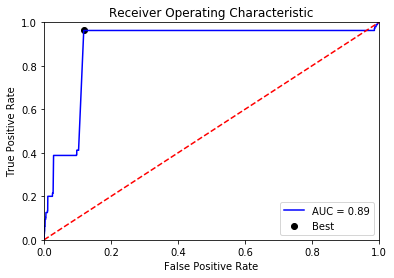

Best Threshold=0.008459, G-Mean=0.644


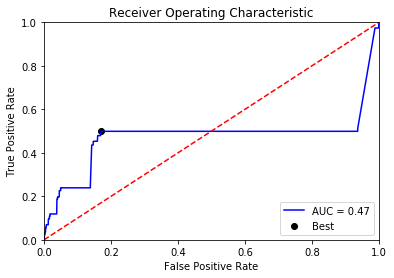

Best Threshold=0.003549, G-Mean=0.542


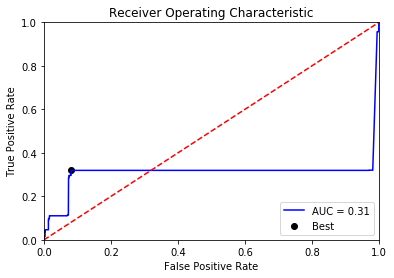

Best Threshold=0.002396, G-Mean=0.396


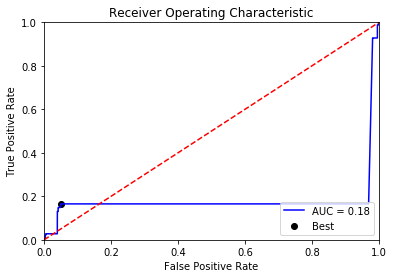

Best Threshold=0.004386, G-Mean=0.969


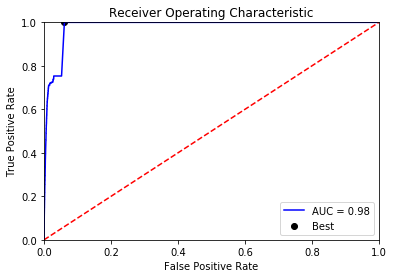

Best Threshold=0.002771, G-Mean=0.335


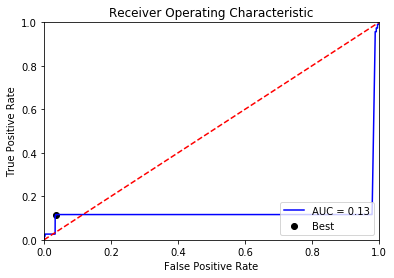

Best Threshold=0.002266, G-Mean=0.454


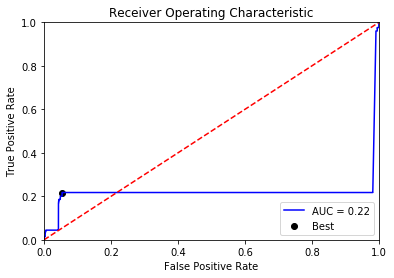

Best Threshold=0.006620, G-Mean=0.907


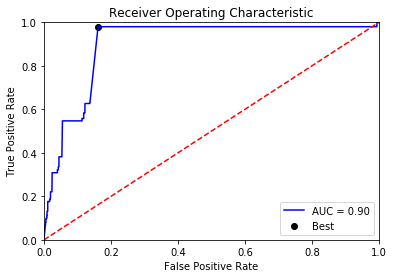

Best Threshold=0.003344, G-Mean=0.904


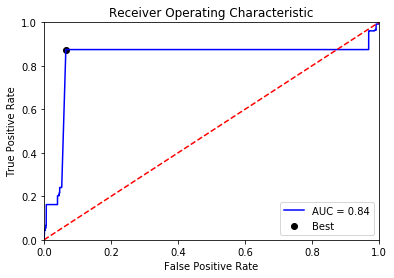

Best Threshold=0.001727, G-Mean=0.343


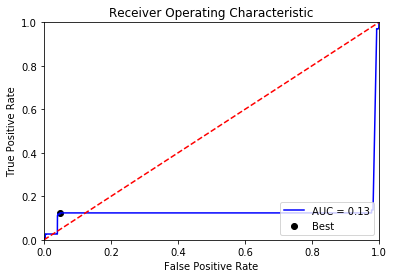

Best Threshold=0.001619, G-Mean=0.454


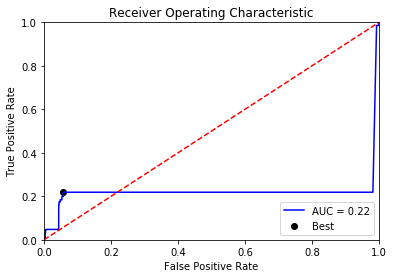

Best Threshold=0.003919, G-Mean=0.934


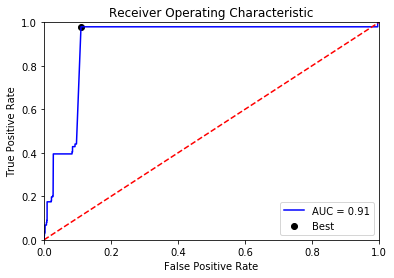

Best Threshold=0.001759, G-Mean=0.355


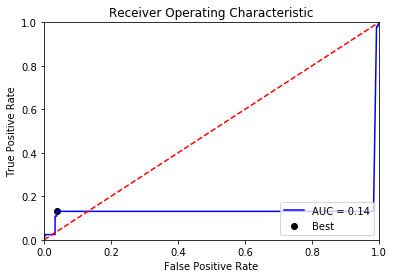

Best Threshold=0.007605, G-Mean=0.356


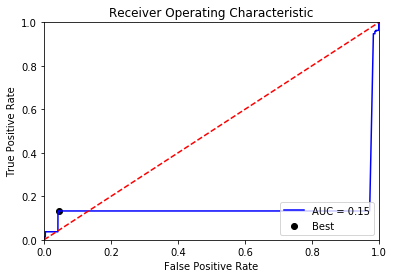

Best Threshold=0.006430, G-Mean=0.950


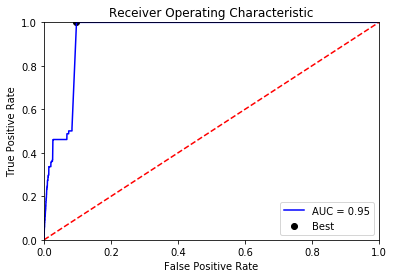

Best Threshold=0.005521, G-Mean=0.918


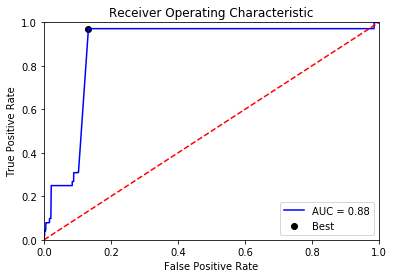

Best Threshold=0.001529, G-Mean=0.972


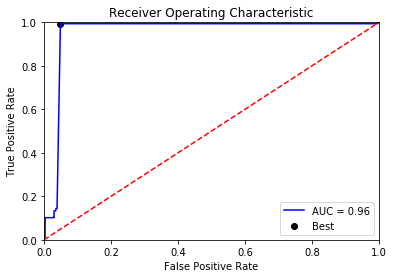

Best Threshold=0.002389, G-Mean=0.962


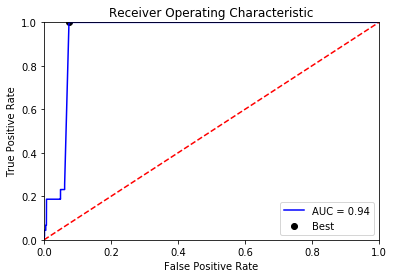

Best Threshold=0.003606, G-Mean=0.934


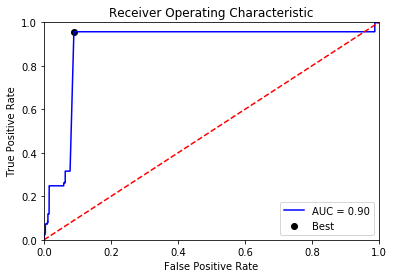

Best Threshold=0.003009, G-Mean=0.524


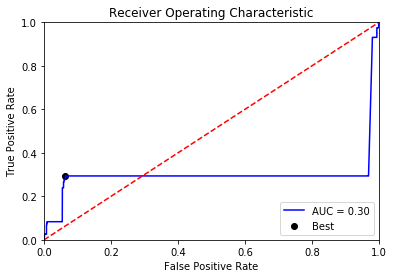

Best Threshold=0.002713, G-Mean=0.404


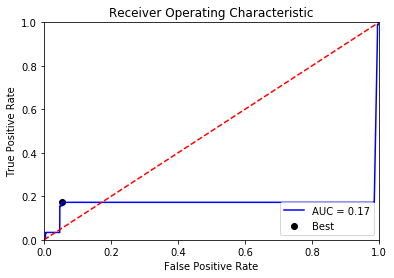

Best Threshold=0.003143, G-Mean=0.603


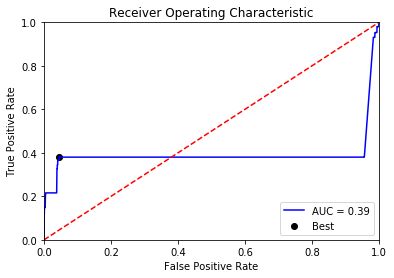

Best Threshold=0.002141, G-Mean=0.960


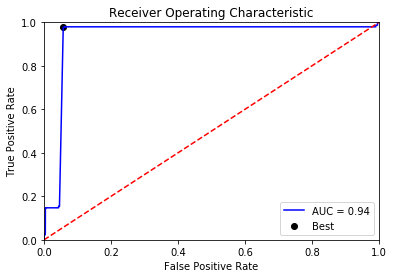

Best Threshold=0.002286, G-Mean=0.958


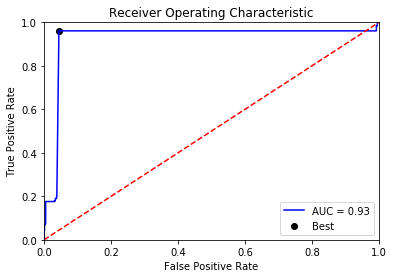

Best Threshold=0.003702, G-Mean=0.482


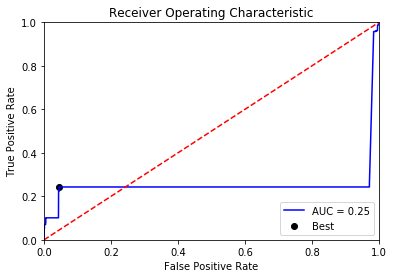

In [67]:
thresh_lr = []
roc_lr = []
for i in range(50):    
    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    #probs = model.predict_proba(X_test)
    #preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test[:,i].numpy(), prediction_lr_test_p[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    thresh_lr.append(optimal_threshold)
    roc_lr.append(roc_auc)
    
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

In [68]:
sum(roc_lr)/50

0.5809972361500851

In [69]:
for i in range(50):
    prediction_lr_test_p[:,i] = to_labels(prediction_lr_test_p[:,i],thresh_lr[i])

In [2]:
#from sklearn.metrics import multilabel_confusion_matrix
#multilabel_confusion_matrix(y.numpy(), prediction_lr_train)


In [71]:
scores_lr = []
for i in range(50):
    scores_lr.append(binary_classification_performance(Y_test[:,i].numpy(),prediction_lr_test_p[:,i]))

In [72]:
f_lr = pd.concat(scores_lr)

# Light GBM model

In [74]:
!pip install lightgbm

In [75]:
from lightgbm import LGBMClassifier

In [76]:
empty_train_1 = []
empty_test_1 = []

empty_train_1p = []
empty_test_1p = []

#f1_list = []
for i in range(50):
    recent_lm_train = X_recent_2[:,[i,i+50,i+100,i+150]]
    freq_lm_train = X_freq_1[:,i]
    recommend_lm_train = X_recommend_1[:,i]
    
    #recent_lm_test = X_recent_2[:,[i,i+50,i+100,i+150]]
    #freq_lm_test = X_freq_1[:,i]
    recommend_lm_test = X_recommend_t[:,i]


    y_lm_train = y_1[:,i]

    X = np.column_stack([recent_lm_train,freq_lm_train,recommend_lm_train])

    #LGBM = LGBMClassifier(class_weight="balanced")
    LGBM = LGBMClassifier()

    LGBM.fit(X,y_lm_train)
    
    X_test = np.column_stack([recent_lm_train,freq_lm_train,recommend_lm_test])
    
    empty_train_1.append(LGBM.predict(X))
    
    empty_train_1p.append((LGBM.predict_proba(X)[:,1]))

    empty_test_1.append(LGBM.predict(X_test))
    
    empty_test_1p.append((LGBM.predict_proba(X_test)[:,1]))
        


In [112]:
prediction_lgbm_train = np.transpose(np.array(empty_train_1))
prediction_lgbm_test = np.transpose(np.array(empty_test_1))

prediction_lgbm_train_p = np.transpose(np.array(empty_train_1p))
prediction_lgbm_test_p = np.transpose(np.array(empty_test_1p))

In [113]:
# prediction_lgbm_test_p
with open('prediction_lgbm_test_p_bce.pkl','wb') as f:
      pickle.dump(prediction_lgbm_test_p, f)

In [78]:
from sklearn.metrics import log_loss
log_loss(Y_test.numpy(),prediction_lgbm_test_p)

4.717151621532554

3.282336481111336e-07
Best Threshold=0.000000, G-Mean=0.948


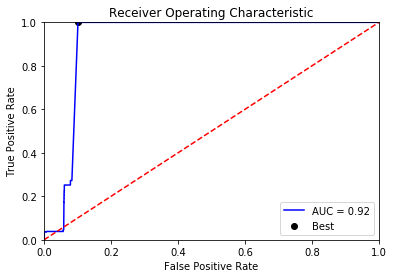

2.298738660457496e-07
Best Threshold=0.000000, G-Mean=0.951


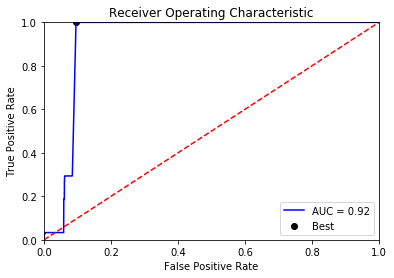

2.7965753673291555e-07
Best Threshold=0.000000, G-Mean=0.963


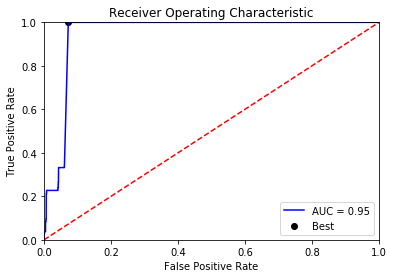

1.8818214485487788e-07
Best Threshold=0.000000, G-Mean=0.974


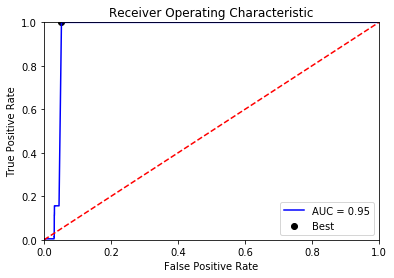

4.7906338309388796e-05
Best Threshold=0.000048, G-Mean=0.669


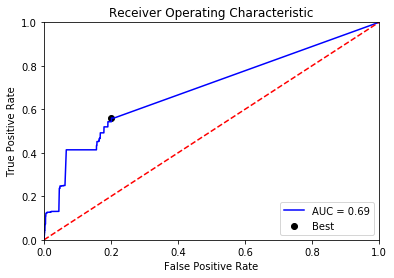

2.2809900806080388e-07
Best Threshold=0.000000, G-Mean=0.958


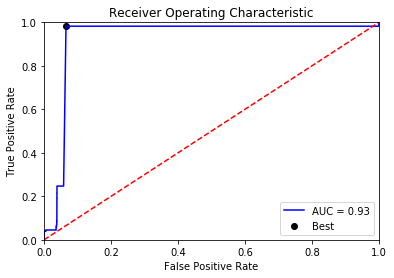

3.5249317852587314e-07
Best Threshold=0.000000, G-Mean=0.961


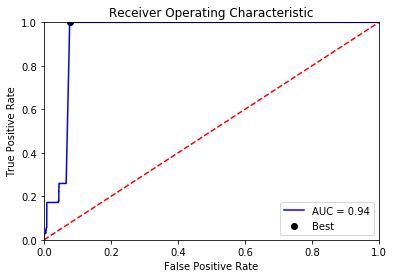

2.0867276779272102e-07
Best Threshold=0.000000, G-Mean=0.964


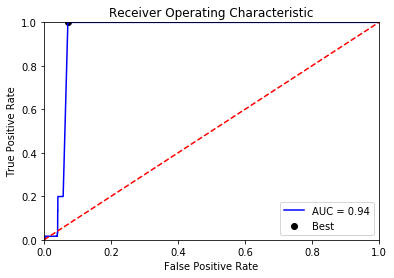

1.6941894718741492e-07
Best Threshold=0.000000, G-Mean=0.963


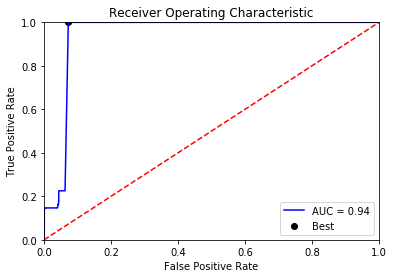

2.502259677166536e-07
Best Threshold=0.000000, G-Mean=0.961


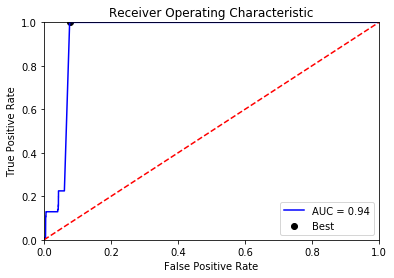

2.7354493435382827e-07
Best Threshold=0.000000, G-Mean=0.957


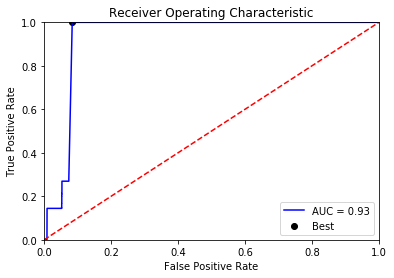

6.14052016625505e-07
Best Threshold=0.000001, G-Mean=0.966


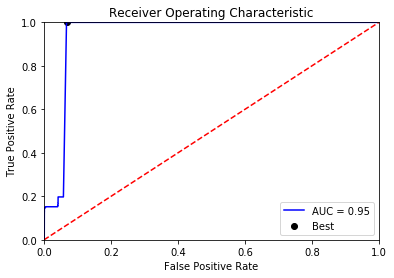

5.510028957179707e-07
Best Threshold=0.000001, G-Mean=0.969


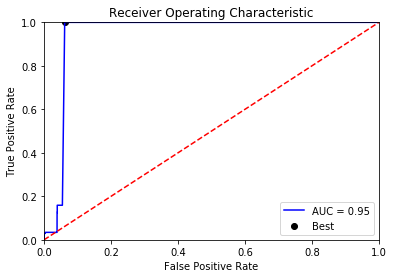

0.00014459487390990717
Best Threshold=0.000145, G-Mean=0.827


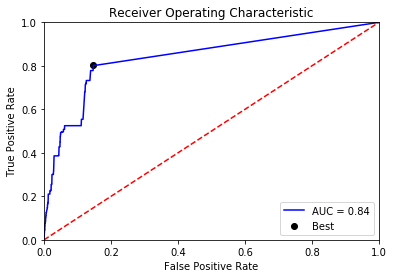

0.00013851401925797134
Best Threshold=0.000013, G-Mean=0.598


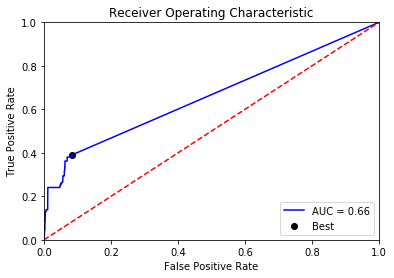

9.381475398815253e-06
Best Threshold=0.000009, G-Mean=0.573


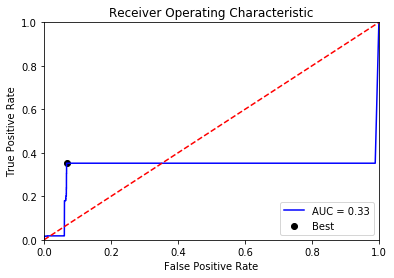

0.00010460296058829792
Best Threshold=0.000105, G-Mean=0.640


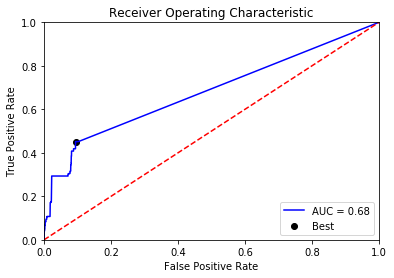

7.66381736747079e-05
Best Threshold=0.000077, G-Mean=0.760


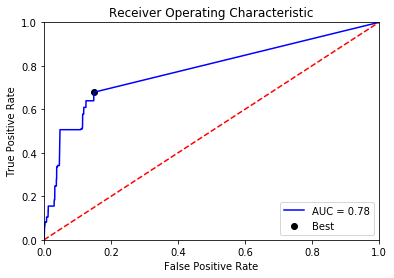

2.7786935103058342e-05
Best Threshold=0.000028, G-Mean=0.682


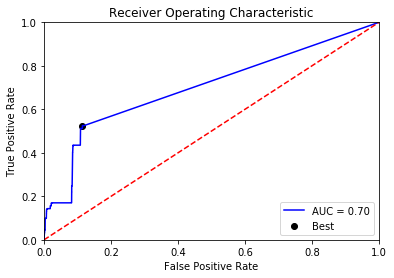

9.895600057300777e-06
Best Threshold=0.000010, G-Mean=0.599


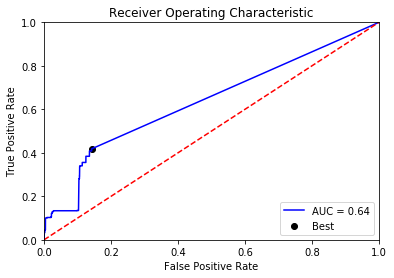

2.1079293028709325e-07
Best Threshold=0.000000, G-Mean=0.966


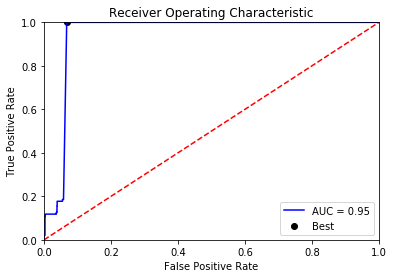

5.364894913623152e-06
Best Threshold=0.000005, G-Mean=0.515


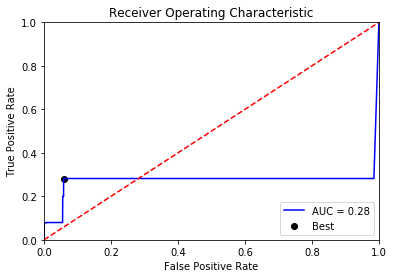

0.0003027465501023428
Best Threshold=0.000303, G-Mean=0.655


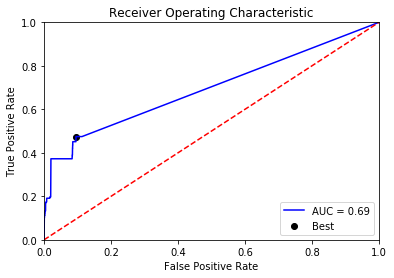

1.3457188840042768e-05
Best Threshold=0.000013, G-Mean=0.502


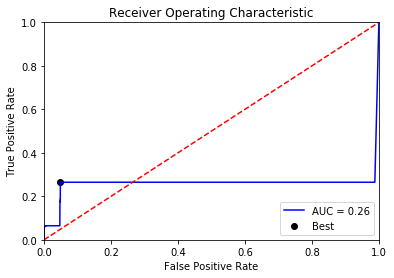

9.909342503377397e-05
Best Threshold=0.000099, G-Mean=0.832


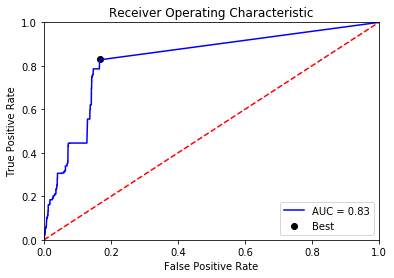

4.2381689616999444e-05
Best Threshold=0.000005, G-Mean=0.637


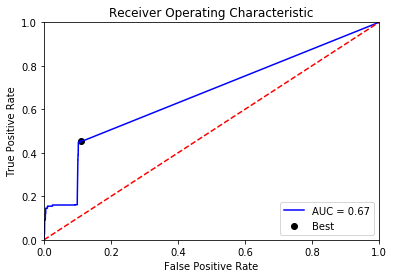

0.00010308664307688633
Best Threshold=0.000103, G-Mean=0.666


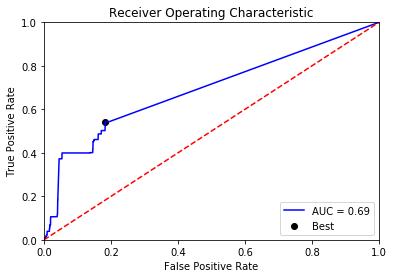

3.1933128700724525e-07
Best Threshold=0.000000, G-Mean=0.944


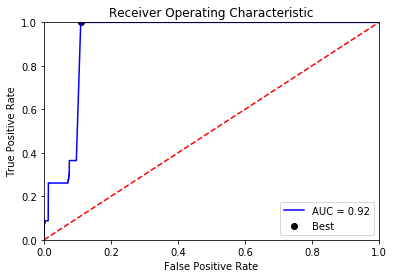

2.591296977452573e-07
Best Threshold=0.000000, G-Mean=0.959


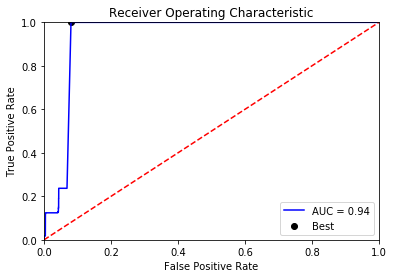

0.0011961383893632543
Best Threshold=0.000852, G-Mean=0.846


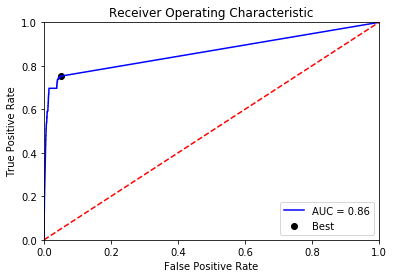

1.7831553878148013e-07
Best Threshold=0.000000, G-Mean=0.966


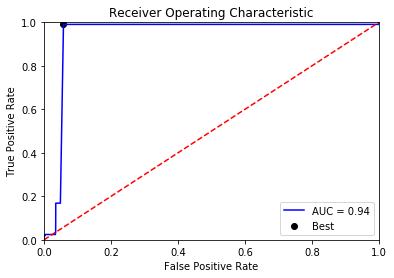

2.2012147202138418e-07
Best Threshold=0.000000, G-Mean=0.963


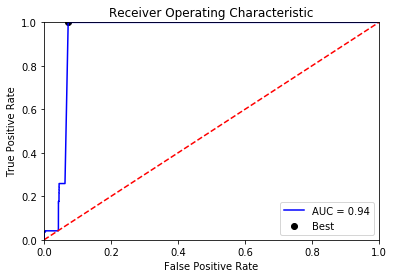

5.14493735117803e-05
Best Threshold=0.000051, G-Mean=0.747


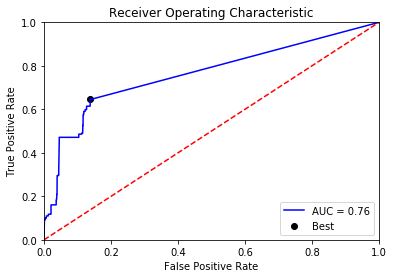

4.257238691251456e-07
Best Threshold=0.000000, G-Mean=0.951


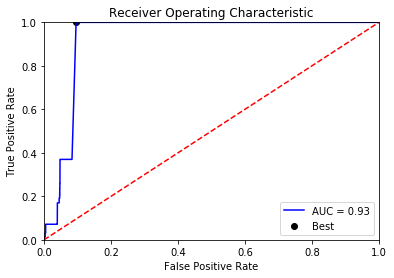

1.6160271281458445e-07
Best Threshold=0.000000, G-Mean=0.965


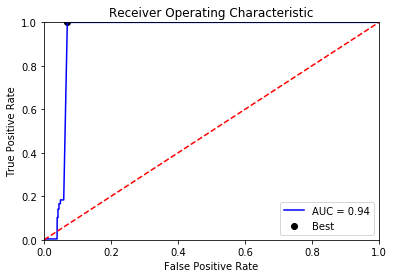

2.2399571470676724e-07
Best Threshold=0.000000, G-Mean=0.961


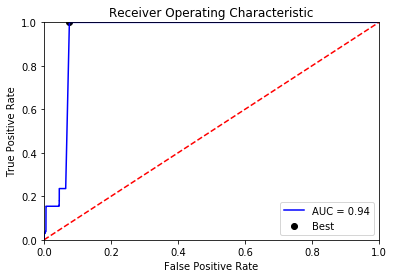

4.8154509323623966e-05
Best Threshold=0.000048, G-Mean=0.656


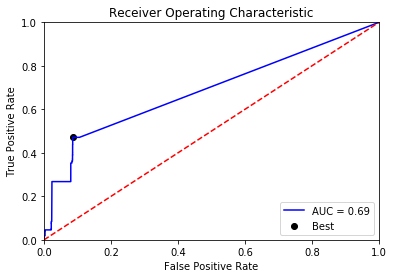

2.429868154242099e-06
Best Threshold=0.000002, G-Mean=0.381


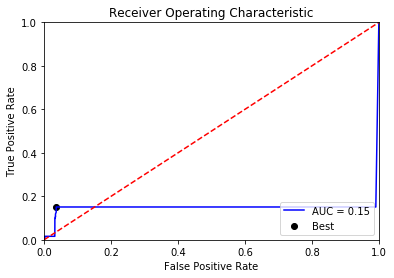

1.866225544551501e-07
Best Threshold=0.000000, G-Mean=0.964


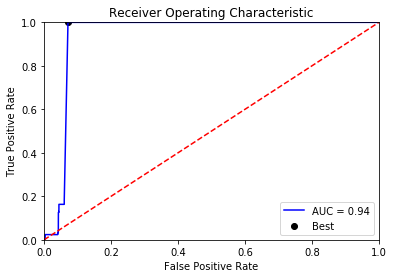

0.0001746866083738156
Best Threshold=0.000175, G-Mean=0.687


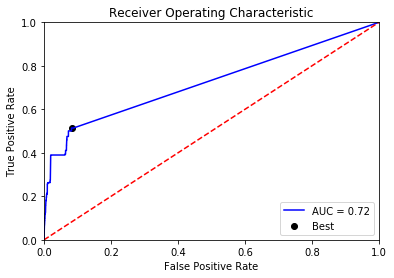

1.2642706720793042e-05
Best Threshold=0.000001, G-Mean=0.547


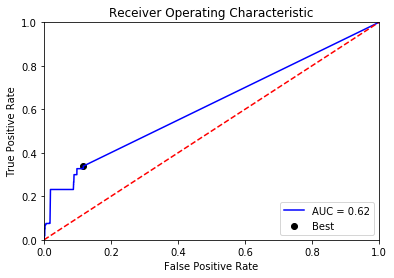

1.4930431012557008e-07
Best Threshold=0.000000, G-Mean=0.973


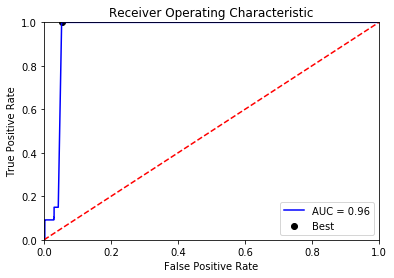

2.3114589731213304e-07
Best Threshold=0.000000, G-Mean=0.958


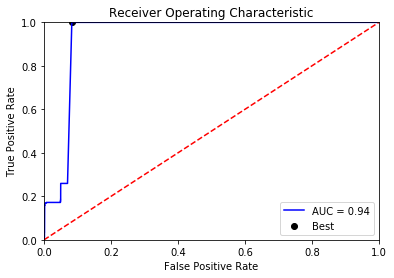

0.00012395635159360367
Best Threshold=0.000124, G-Mean=0.584


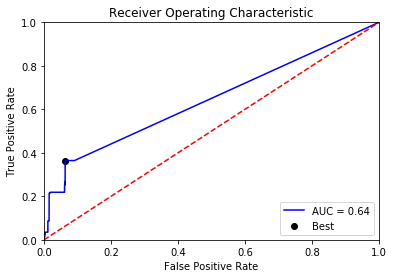

2.883836116680528e-07
Best Threshold=0.000000, G-Mean=0.951


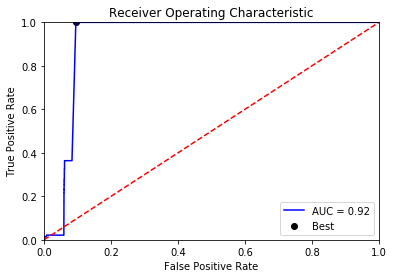

3.1212448687651513e-07
Best Threshold=0.000000, G-Mean=0.960


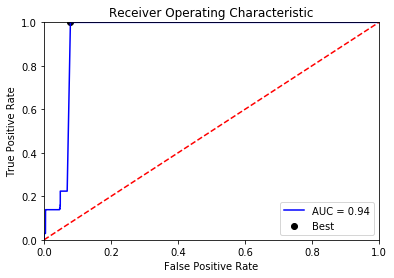

4.668966310236646e-06
Best Threshold=0.000005, G-Mean=0.651


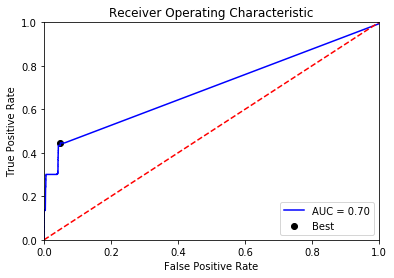

4.142291566473938e-07
Best Threshold=0.000000, G-Mean=0.964


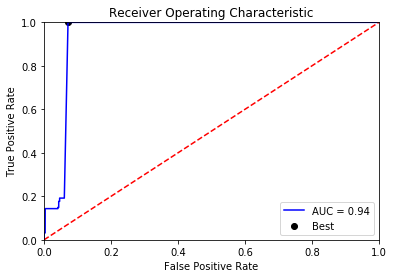

1.4591157158204824e-07
Best Threshold=0.000000, G-Mean=0.974


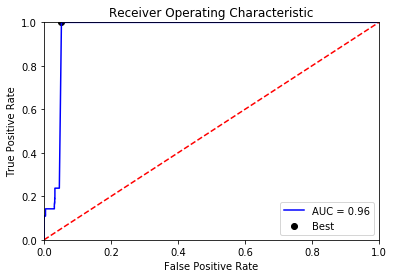

3.338673273993385e-07
Best Threshold=0.000000, G-Mean=0.956


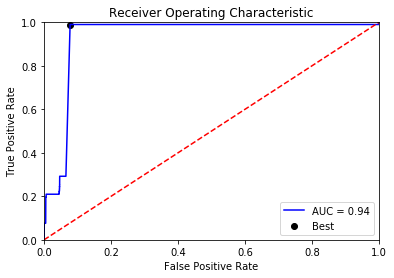

In [79]:
thresh_lgbm = []
roc_lgbm = []
for i in range(50):    
    import sklearn.metrics as metrics
    # calculate the fpr and tpr for all thresholds of the classification
    #probs = model.predict_proba(X_test)
    #preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test[:,i].numpy(), prediction_lgbm_test_p[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = threshold[optimal_idx]
    print(optimal_threshold)
    thresh_lgbm.append(optimal_threshold)
    roc_lgbm.append(roc_auc)
    
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

In [80]:
sum(roc_lgbm)/50

0.803789198986448

In [81]:
for i in range(50):
    prediction_lgbm_test_p[:,i] = to_labels(prediction_lgbm_test_p[:,i],thresh_lgbm[i])

In [83]:
scores_lgbm = []
for i in range(50):
    scores_lgbm.append(binary_classification_performance(Y_test[:,i].numpy(),prediction_lgbm_test_p[:,i]))

In [84]:
f_lgbm = pd.concat(scores_lgbm)

# final probs

In [87]:
# numpy_probas_test



Optimization

In [90]:
!pip install cplex


In [91]:
import cvxpy
import numpy as np
print(cvxpy.installed_solvers())

['CPLEX', 'CVXOPT', 'ECOS', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [92]:
P = 5

In [93]:
np.random.seed(30)

In [94]:
probabilities = numpy_probas_test[0,:]
#probabilities = prediction_lr_test[0,:]

In [ ]:
recomm = []
revenue = []
for i in range(len(numpy_probas_test)):
    probabilities = numpy_probas_test[i,:]

    selection = cvxpy.Variable(len(weights), boolean=True)

    weight_constraint = cvxpy.sum(selection, axis=0) == 5

    total_revenue = probabilities * weights * selection 

    Revenue_Generation_problem = cvxpy.Problem(cvxpy.Maximize(total_revenue), [weight_constraint])

    # Solving the problem
    Revenue_Generation_problem.solve(solver=cvxpy.CPLEX, verbose=True)
    
    revenue.append(total_revenue.value)
    recomm.append(selection.value)
    clear_output(wait=True) 
    
    

In [ ]:
probs